In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import matplotlib.dates as mdates

# Log4j2 data

In [2]:
row_number = 1
df = pd.read_fwf('../data/MCI_log4j2_releases_time.csv', infer_nrows=row_number, header=None)
df = df[0].str.split(';', expand=True)
col_number = df.shape[1]
print(df.shape)

log4jRhythm = []
log4jReleasesDate = []
for index, row in df.iterrows():
    for i in range(2, col_number):
        if(row[i] == None):
            break
        date = datetime.strptime(row[i], '%Y-%m-%d')
        previousDate = datetime.strptime(row[i-1], '%Y-%m-%d')
        diffInDays = (date-previousDate).days
        if(date.year > 2019 and diffInDays > 0):
            log4jRhythm.append(diffInDays)
            log4jReleasesDate.append(date)

(1, 54)


# Log4j2 dependencies data

In [3]:
row_number = 149
df_dependencies = pd.read_fwf('../data/MCI_lo4j2_dependencies_release_time.csv', infer_nrows=row_number, header=None)
df_dependencies = df_dependencies[0].str.split(';', expand=True)
col_number = df_dependencies.shape[1]
print(df_dependencies.shape)

dictDiffByMonth = {}
for index, row in df_dependencies.iterrows():
    for i in range(2, col_number):
        if(row[i] == None):
            break
        date = datetime.strptime(row[i], '%Y-%m-%d')
        previousDate = datetime.strptime(row[i-1], '%Y-%m-%d')
        diffInDays = (date-previousDate).days
        month = datetime.strptime(date.strftime('%Y-%m'), '%Y-%m')
        if(date.year > 2019 and diffInDays > 0):
            try:
                dictDiffByMonth[month].append(diffInDays)
            except KeyError:
                newList = [diffInDays]
                dictDiffByMonth[month] = newList
                
dependenciesTime = []
dependenciesReleasesDate = []
nbReleasesByMonth = []
sortedKeys = sorted(dictDiffByMonth.keys())
for key in sortedKeys:
    dependenciesReleasesDate.append(key)
    dependenciesTime.append(sum(dictDiffByMonth[key]) / len(dictDiffByMonth[key]))
    nbReleasesByMonth.append(len(dictDiffByMonth[key]))

(149, 169)


# Save data

In [4]:
with open('log4jRhythmData.txt', 'w') as f:
    for item in log4jRhythm:
        f.write("%s\n" % item)
with open('log4jDatesData.txt', 'w') as f:
    for item in log4jReleasesDate:
        f.write("%s\n" % item)

with open('dependenciesRhythmData.txt', 'w') as f:
    for item in dependenciesReleasesDate:
        f.write("%s\n" % item)
with open('dependenciesNbReleasesData.txt', 'w') as f:
    for item in nbReleasesByMonth:
        f.write("%s\n" % item)
with open('dependenciesDatesData.txt', 'w') as f:
    for item in dependenciesTime:
        f.write("%s\n" % item)

# Plot data

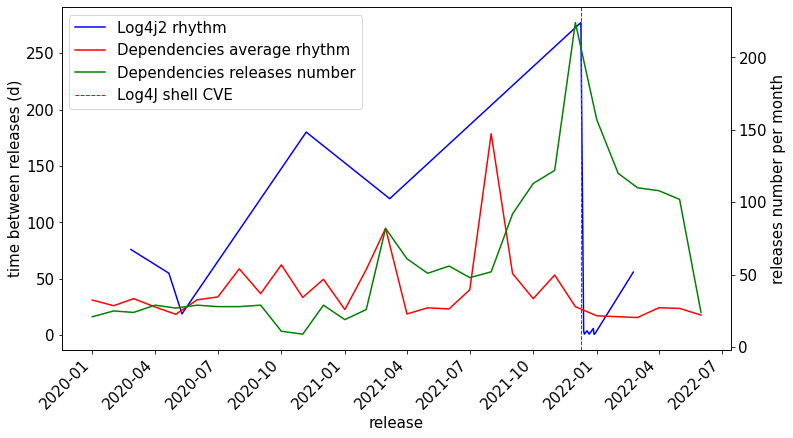

In [5]:
fig = plt.figure(figsize =(12, 7))

x = range(2, len(log4jRhythm)+2)

ax = plt.subplot()
ax2 = ax.twinx()

l1, = ax.plot(log4jReleasesDate, log4jRhythm, color='blue')
l2, = ax.plot(dependenciesReleasesDate, dependenciesTime, color='red')
l3, = ax2.plot(dependenciesReleasesDate, nbReleasesByMonth, color='green')

ax2.get_xaxis().set_visible(False)

ax.set_xlabel('release')
ax.set_ylabel('time between releases (d)')
ax2.set_ylabel('releases number per month')

fig.autofmt_xdate(rotation=45)

plt.rcParams.update({'font.size': 15})

dateLog4J = datetime.strptime("2021-12-09", '%Y-%m-%d')
l4 = plt.axvline(x=dateLog4J, color='r', lw=1, linestyle="--")

plt.legend([l1, l2, l3, l4], ["Log4j2 rhythm", "Dependencies average rhythm", "Dependencies releases number", "Log4J shell CVE"])

plt.savefig('log4j2_dependencies_evolution.png', format='png')
plt.show()
plt.close()